# Adult Census Income Dataset
## Predicting whether an indiviual earns more than 50,000 a year based on features. (e.g Age, Education, Occupation, etc.)

# Understanding & Cleaning the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder #Using this instead of mapping as there is too many variables
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import random
auc

<function sklearn.metrics._ranking.auc(x, y)>

In [2]:
#Loading the dataset
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
#Identifying the null values.
#Null in this dataset is dubbed as '?'

#Columns with '?'
columns_with_null = df.columns[df.map(lambda x: '?' in str(x)).any()].values
print('The columns with Null Values(?):', columns_with_null)

#Rows with '?'
rows_with_null = df[df.map(lambda x: '?' in str(x)).any(axis=1)]
print('\nRows with Null Values(?):')
rows_with_null


The columns with Null Values(?): ['workclass' 'occupation' 'native.country']

Rows with Null Values(?):


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


The rows with Null Values can be dropped as it is only takes up about 8% of the total dataset!

In [4]:
#Dropping the null values
#Must convert '?' as it is not considered a Null Value in pandas
df = df.replace('?', pd.NA).dropna()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
#Final Shape after Cleaning
print(df.shape)

(30162, 15)


In [6]:
#Finding how many unique variables
df['race.o'] = df['race']
categorical_columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
print('Total Number of Unique Variables:', df[categorical_columns].nunique().sum())

Total Number of Unique Variables: 82


There are too many variables to input using Mapping. Thus, using Label Encoders would be more efficient.

In [7]:
#Encoding the Categorical Columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [8]:
#Encode the Target Variable
#Make a new column labeled 'Outcome'
df['outcome'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df['outcome']

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: outcome, Length: 30162, dtype: int64

In [9]:
#Finding the intervals
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,outcome
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# Visual Representation of the Dataset

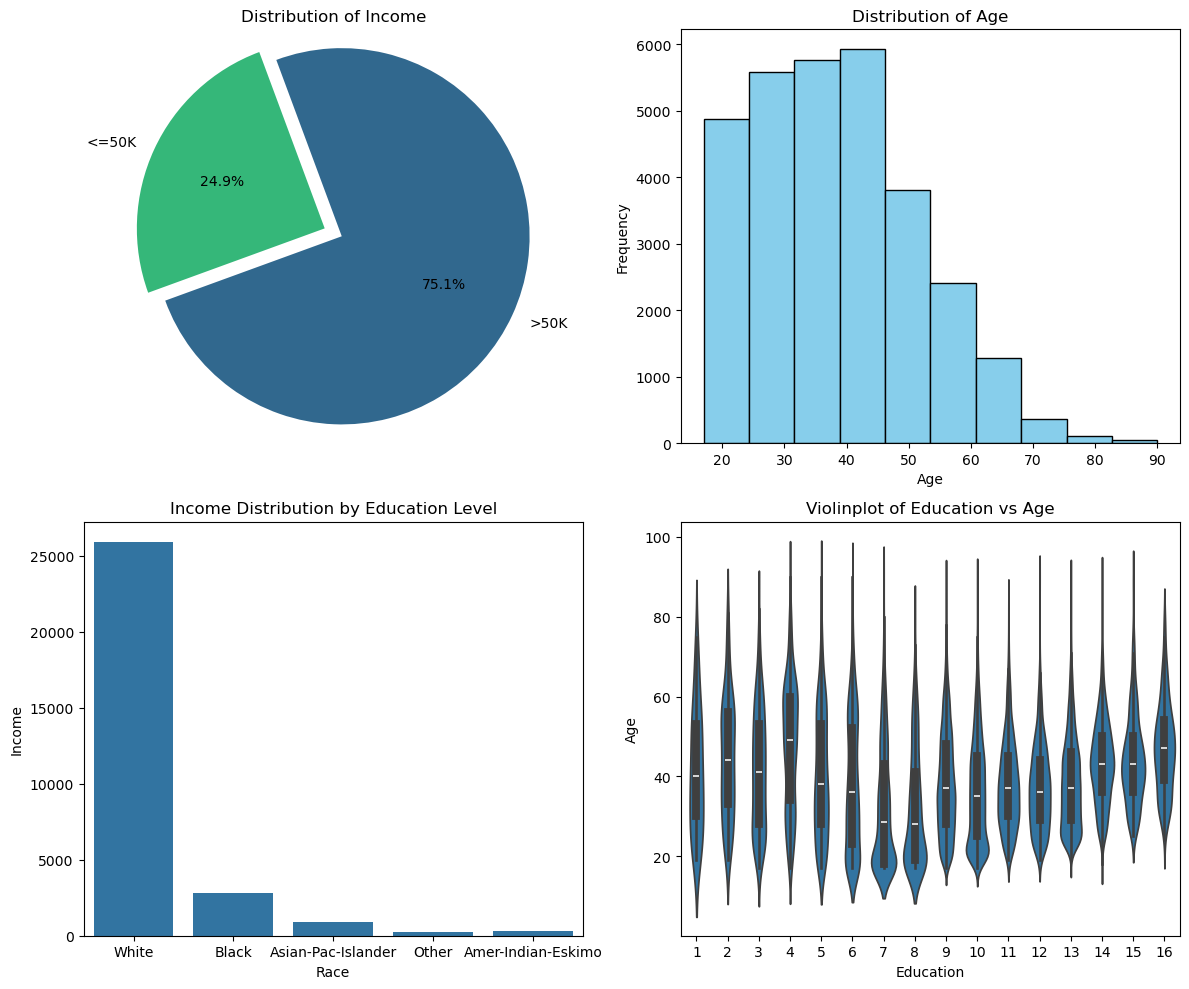

In [10]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Pie Chart
income_counts = df['income'].value_counts()
explode = (0, 0.1)
palette = sns.color_palette("viridis", len(df['income'].unique()))
axs[0, 0].pie(income_counts, labels=['>50K', '<=50K'], autopct='%1.1f%%', colors=palette, startangle=200, explode=explode)
axs[0, 0].set_title('Distribution of Income')
axs[0, 0].axis('equal')

# Histogram
axs[0, 1].hist(df['age'], bins=10, color='skyblue', edgecolor='black')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Age')

# Count Plot
sns.countplot(ax=axs[1, 0], x='race.o', data=df)
axs[1, 0].set_xlabel('Race')
axs[1, 0].set_ylabel('Income')
axs[1, 0].set_title('Income Distribution by Education Level')

#Scatterplot
sns.violinplot(ax=axs[1, 1], x='education.num', y='age', data=df)
axs[1, 1].set_xlabel('Education')
axs[1, 1].set_ylabel('Age')
axs[1, 1].set_title('Violinplot of Education vs Age')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Violin Plot:

Each "violin" represents the distribution of age for a specific level of education.
The width of each violin indicates the density of data points at different ages for that education level.
The wider the violin at a particular age, the more individuals there are at that age for that education level.
Interpretation:

Central White Dot: Represents the median age for each education level.
Thick Black Bar: Represents the interquartile range (IQR), showing where the middle 50% of the ages fall.
Thin Black Line: Represents the range excluding outliers (similar to a box plot's whiskers).
Shape and Width: The shape of each violin helps to visualize the distribution of ages. For example, if the violin is wider at a certain age, there are more individuals of that age within that education level.
Observations:

For lower education levels (0-3), the distribution of age is relatively wide, indicating individuals of varying ages.
As education levels increase (4-15), the distribution of age tends to be more concentrated, with more individuals around the median age.
Higher education levels (e.g., 12-15) show a concentration of individuals in a narrower age range, indicating that people typically achieve these levels of education within a certain age range.
General Trends:

The median age tends to be in the 30-40 range across most education levels.
The age distribution for higher education levels is more concentrated and shows fewer outliers, suggesting a more consistent age range for higher education achievements.

In [11]:
df.nunique()
#Choose the feature with 5 unique values.

age                  72
workclass             7
fnlwgt            20263
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        118
capital.loss         90
hours.per.week       94
native.country       41
income                2
race.o                5
outcome               2
dtype: int64

## Correlation

In [12]:
column_to_plot = ['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status', 'occupation',
                  'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
                  'native.country', 'outcome']
corr_matrix = df[column_to_plot].corr()
corr_matrix

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,outcome
age,1.000000,0.080540,-0.076511,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education.num,0.043526,0.037833,-0.044992,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital.status,-0.276373,-0.034241,0.032163,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699
capital.gain,0.080154,0.035350,0.000422,0.124416,-0.042418,0.022162,-0.058259,0.014353,0.048814,1.000000,-0.032229,0.080432,0.008530,0.221196


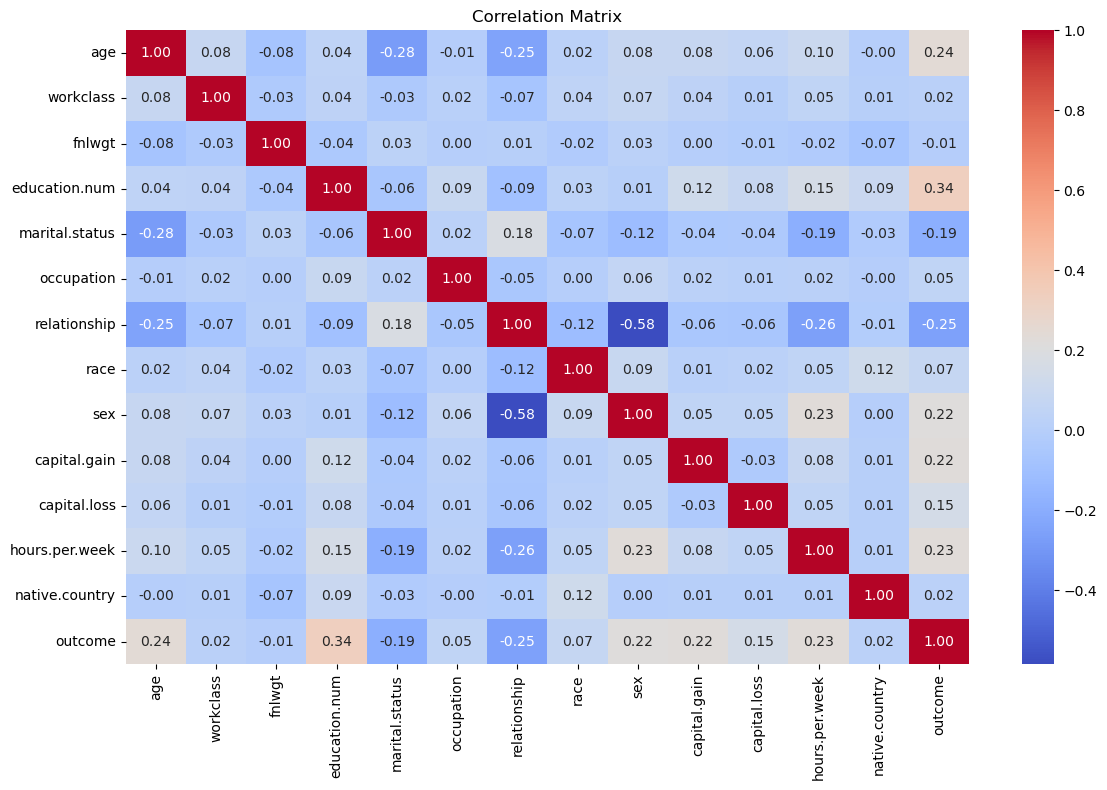

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Supervised Learning Models

In [14]:
# Identifying Features and Target Variable
X = df.drop(columns=['education', 'income', 'outcome', 'race.o']) #Features
y = df['outcome'] #Target

In [15]:
# Defining Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Stratify is to ensure it takes equal amounts from both

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Defining the models
estimators = [
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)),
    ('nb', GaussianNB())
]

#Performing GridSearchCV for the best model
param_grid = {
    'lr': {
        'max_iter': [1000, 5000, 10000],
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2']
    },
    'dt': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'rf': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'nb': {}
}

best_estimator ={}
for name, model in estimators:
    grid_search = GridSearchCV(model, param_grid[name], cv=StratifiedKFold(n_splits=3), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimator[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.2f}")

Best parameters for lr: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation accuracy for lr: 0.82
Best parameters for dt: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy for dt: 0.84
Best parameters for rf: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation accuracy for rf: 0.86
Best parameters for nb: {}
Best cross-validation accuracy for nb: 0.79


In [16]:
# Using the best parameters
best_estimators = [
    ('lr', LogisticRegression(C=0.1, max_iter=1000, penalty='l2', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf= 4, min_samples_split= 2, random_state=42)),
    ('nb', GaussianNB())
]

# Stacking Classifier
scf = StackingClassifier(estimators=best_estimators, final_estimator=LogisticRegression(max_iter= 1000, C= 0.1, penalty= 'l2', random_state= 42))

In [17]:
#Fitting the model
scf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.1, max_iter=1000,
                                                   random_state=42)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=4,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_leaf=4,
                                                       random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression(C=0.1, max_iter=1000,
                                                      random_state=42))

In [26]:
##Checking the Scores

for name in estimators:
    scores = cross_val_score(scf, X_train, y_train, cv=StratifiedKFold(n_splits=3), scoring='accuracy')
    print(f"{name} Cross-Validation Score: {scores.mean()} +/- {scores.std()}")

# Accuracy Score
y_pred = scf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Recall Score
recall = recall_score(y_test, y_pred)
print('Recall Score:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

# ROC-AUC Score
y_pred_prob = scf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC-AUC Score:', roc_auc)

## Classification Report
classification = classification_report(y_test, y_pred)
print('Classification:')
print(classification)

## Confusion Matrix
confuse = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confuse)

('lr', LogisticRegression(max_iter=10000, random_state=42)) Cross-Validation Score: 0.855402213104563 +/- 0.0018964832672133183
('dt', DecisionTreeClassifier(random_state=42)) Cross-Validation Score: 0.855402213104563 +/- 0.0018964832672133183
('rf', RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)) Cross-Validation Score: 0.855402213104563 +/- 0.0018964832672133183
('nb', GaussianNB()) Cross-Validation Score: 0.855402213104563 +/- 0.0018964832672133183
Accuracy Score: 0.8693850488977292
Recall Score: 0.6311584553928096
F1 Score: 0.706408345752608
ROC-AUC Score: 0.9245146837248709
Classification:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4531
           1       0.80      0.63      0.71      1502

    accuracy                           0.87      6033
   macro avg       0.84      0.79      0.81      6033
weighted avg       0.86      0.87      0.86      6033

Confusion Mat

# Plot the Roc

ROC-AUC Score: 0.9245146837248709


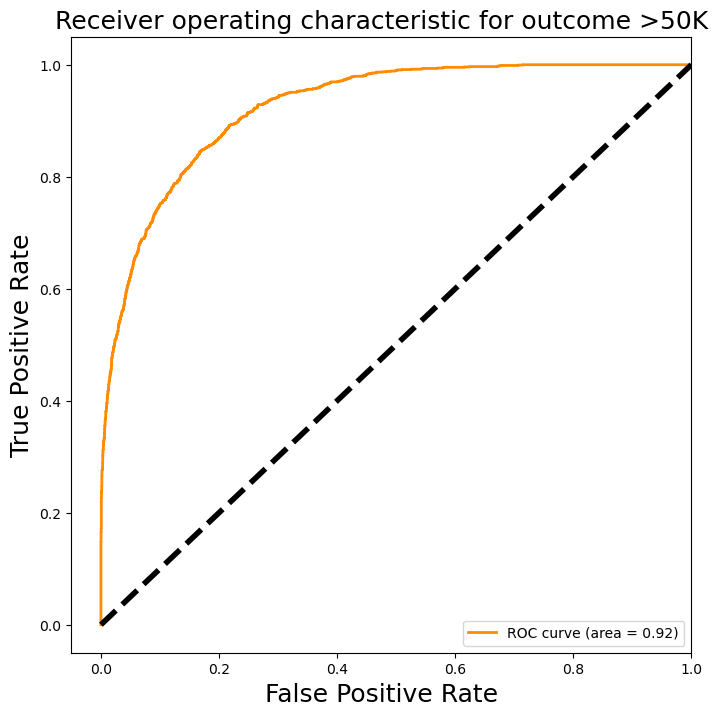

In [24]:
y_predict_probability = scf.predict_proba(X_test)
# Find fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_predict_probability[:, 1])
# Find auc
roc_auc_value = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc_value)
# Plot of a ROC curve
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for outcome >50K', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Inputting new variables

In [20]:
# Testing the model using random integers within the dataset
rand_int = random.randint(0,X_test.shape[0])

print(X_test[rand_int])
x_new = X_test[rand_int].reshape(1, -1)

print('The outcome of the inputted value is:', scf.predict(x_new))

[-1.63259308 -0.21020344 -0.37483131 -1.62371075  0.94864026  1.25160152
  0.99173068  0.38593432 -1.43964708 -0.14756532 -0.21744423 -1.74970377
  0.26450413]
The outcome of the inputted value is: [0]


In [21]:
# Testing the model with a completly different values

#new_data = [[('age', 26),
#            ('workclass', 2),
#            ('fnlwgt', 189630),
#            ('education', 'HS-grad'),
#            ('education.num', 9)
#            ('marital.status', 10)
#            ('occupation', 6),
#            ('relationship', 4),
#            ('race', 4),
#            ('sex', 1),
#            ('capital.gain', 0),
#            ('capital.loss', 3690),
#           ('hours.per.week', 43),
#            ('native.country', 34),
#           ]

In [22]:
# Testing the model with a completly different values

new_data = pd.DataFrame([[26, 2, 189630, 9, 10, 6, 4, 4, 1, 0, 3690, 43, 34]], columns=X.columns)

#Scale it
new_data_scaled = scaler.transform(new_data)

print('The outcome of the inputted value is:', scf.predict(new_data_scaled))

The outcome of the inputted value is: [0]
